In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import missingno as msno
import seaborn as sns
import numpy as np

In [6]:
Data=pd.read_csv('/content/music_genre.csv')


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [8]:
Data["tempo"]=Data["tempo"].replace('?',np.nan)
Data["tempo"]=Data["tempo"].astype(float)



Data['tempo']=Data['tempo'].fillna(Data.groupby(['music_genre'])['tempo'].transform('mean'))

In [9]:
Data = Data.dropna()


On observe un pivot table qui represente les noms d'artistes et leurs nombres d'occurences dans chaques music genres pour ensuite appliquer le k means sur les artist_names en fonction du nombre d'occurence dans music genre

In [10]:
grouped_df = Data.groupby([ 'music_genre','artist_name']).size().reset_index(name='count')
pivot_table = pd.pivot_table(grouped_df, values='count', index='artist_name', columns='music_genre', fill_value=0)
pivot_table

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


In [11]:
a=pd.DataFrame(pivot_table)

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

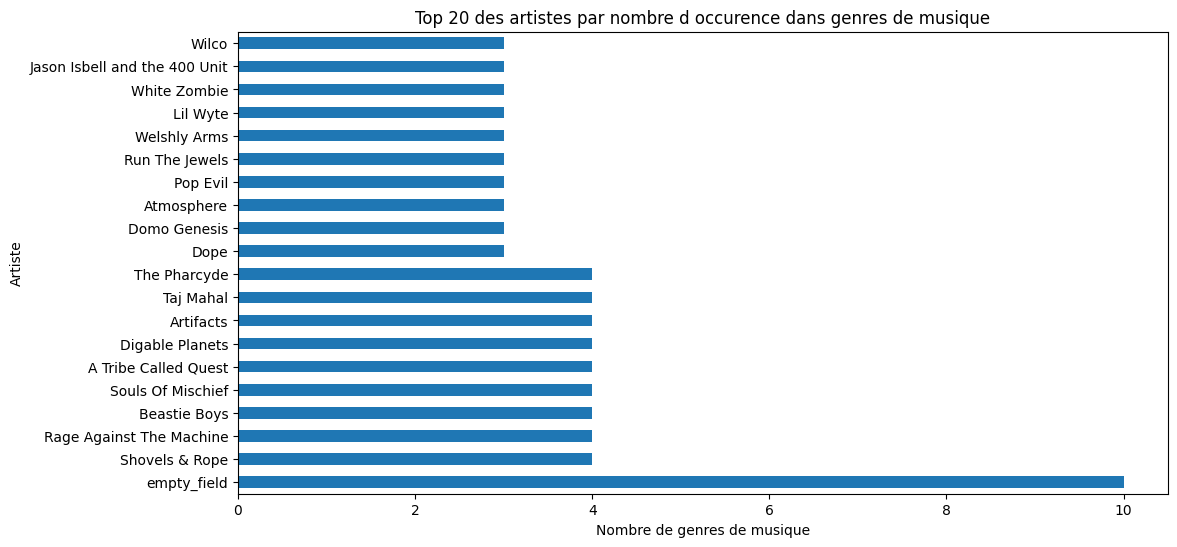

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
# Regrouper les données par artiste et sommer les genres de musique
grouped = Data.groupby('artist_name')['music_genre'].nunique()

grouped = grouped.sort_values(ascending=False)

# Visualiser les résultats dans un graphique
fig, ax = plt.subplots(figsize=(12,6))
grouped.head(20).plot(kind='barh', ax=ax)
ax.set_title('Top 20 des artistes par nombre d occurence dans genres de musique')
ax.set_xlabel('Nombre de genres de musique')
ax.set_ylabel('Artiste')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

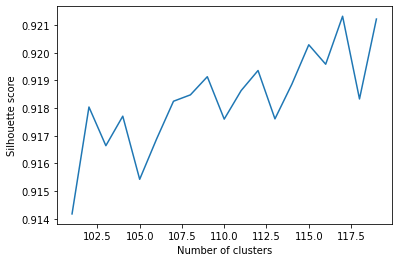

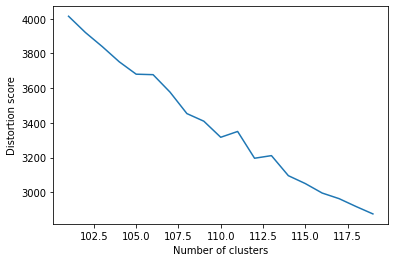

In [11]:
from scipy.sparse import csr_matrix

# Convert your data to a sparse matrix
sparse_matrix = csr_matrix(pivot_table)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(sparse_matrix)
distortion_scores = []

# Compute silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range(101, 120):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(cos_sim_matrix)
    silhouette_scores.append(silhouette_score(cos_sim_matrix, cluster_labels))
    distortion_scores.append(kmeans.inertia_)
# Plot silhouette scores vs number of clusters
plt.plot(range(101, 120), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Compute distortion scores for different number of clusters


# Plot distortion scores vs number of clusters
plt.plot(range(101, 120), distortion_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.show()


Vu que k=109 donne un silhouette 0.92 tres proche de 1 et une distortion faible on utilise la reduction d'espace a 109 comme ca on passe de 6800 aritst_name a 109. on aurait pu choisir plus grand k mais on cherche a éviter l'overfitting 


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix

# Convert your data to a sparse matrix
sparse_matrix = csr_matrix(pivot_table)
cos_sim_matrix = cosine_similarity(sparse_matrix)

# Run kmeans with k=109
kmeans = KMeans(n_clusters=109, random_state=42)
cluster_labels = kmeans.fit_predict(cos_sim_matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


on mappe les artist_name en leurs numéro de cluster coresspondant puis on choisit de faire le dummy variables afin d'eviter de donner de l'importance au numero de cluster et donc on les traites comme des variables qualitatives au lieu de quantitatives


In [15]:
diction={}
for i in range(6863):
  diction[a.index[i]]=cluster_labels[i]

In [16]:
Data['cluster'] = Data['artist_name'].replace(diction)
dummies = pd.get_dummies(Data['cluster'], prefix='column_name')

# concatenate dummies with original dataframe
Data = pd.concat([Data, dummies], axis=1)
Data = Data.drop('cluster', axis=1)

In [17]:
dummie = pd.get_dummies(Data['key'], prefix='column_name')

# concatenate dummies with original dataframe
Data = pd.concat([Data, dummie], axis=1)


In [31]:
Data = Data.drop('instance_id', axis=1)

In [32]:
Data.columns

Index(['artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness',
       ...
       'column_name_B', 'column_name_C', 'column_name_C#', 'column_name_D',
       'column_name_D#', 'column_name_E', 'column_name_F', 'column_name_F#',
       'column_name_G', 'column_name_G#'],
      dtype='object', length=138)

Ce code définit une classe MyModel qui implémente un modèle de classification  binaire de 10 labels en utilisant la régression logistique avec oversampling en utilisant la technique SMOTE pour chaque OneVSall classification . Pour chaque label le modéle s'entraine sur un dataset et donne des probabiltés d'appartenance a cette classe ou non . On combine les probabiltés d'appartenance a chaque classe pour les 10 modéles et on donne 1 a la valeur la plus élevé et 0 pour le reste.Donc on combine 10 modéles de logistic regression pour faire la classification binaire de 10 labels.

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin

class MyModel(BaseEstimator, ClassifierMixin):
    def __init__(self,C=0.1,penalty='l2',solver='lbfgs'):
        self.C = C
        self.penalty=penalty
        self.solver=solver

     #   self.clf = LogisticRegression()
        self.oversampler = SMOTE()
        self.models = [LogisticRegression(C=C,solver=solver,penalty=penalty,max_iter=1000) for _ in range(10)]
    def fit(self, X, y_bin):
        
       # mlb = MultiLabelBinarizer()
        #y_bin = mlb.fit_transform(y)
        for i, model in enumerate(self.models):
            X_resampled, y_resampled = self.oversampler.fit_resample(X, y_bin[:, i])
            self.models[i]=model.fit(X_resampled, y_resampled)
            
    def predict(self, X):
        #print(len(self.models))
        y_pred1 = np.zeros((X.shape[0], len(self.models)))
        y_pred2 = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            a = model.predict_proba(X)
            y_pred1[:, i] = a[:, 0]
            y_pred2[:, i] = a[:, 1]
           # print(y_pred2.shape)
        
        new_arr = np.zeros_like(y_pred2)

        new_arr[np.arange(y_pred2.shape[0]), np.argmax(y_pred2, axis=1)] = int(1)
        return new_arr    
    def score(self, X, y, sample_weight=None):
       # y = mlb.fit_transform(y)
      #  print("score",y.shape)
        y_pred = self.predict(X)
     #   print("score 0",y_pred.shape)
       # return f1_score(y, y_pred, average='weighted', sample_weight=sample_weight)
        return accuracy_score(y,y_pred)

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV

ss = StandardScaler()
my_model = MyModel()

param_grid = {
    'penalty': [ 'l2',  ],
    'C': [0.1,0.5, 1, 10],
    'solver': [ 'lbfgs', 'liblinear']

}
#pipeline = Pipeline(('estimator', my_model])
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)
grid_search = GridSearchCV(my_model, param_grid=param_grid, cv=5)
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [127]:
print(grid_search.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

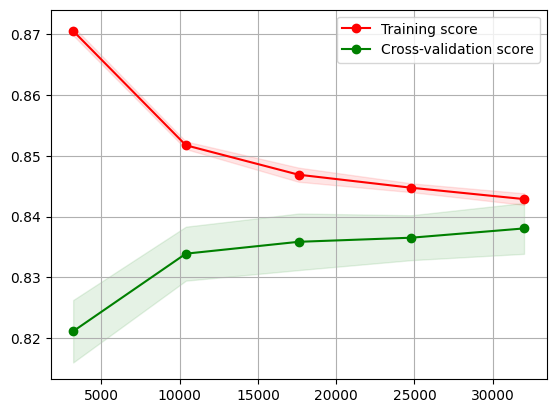

In [43]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)

my_model = MyModel(C= 10, penalty= 'l2', solver= 'liblinear')

plot_learning_curve(my_model, X_train, y_train,cv=5,n_jobs=1)


In [40]:
Data.shape

(50000, 138)

Le score appliqué est le Accuracy-score avec une validation croisée de 5. On remarque que le score d'entraînement diminue tandis que le score de validation augmente, puis les deux stagnent à 0,84. Ainsi, le modèle a bien appris et peut généraliser.

In [41]:
from sklearn.metrics import multilabel_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values), Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)
y_train = mlb.transform(y_train)
my_model = MyModel(C= 10, penalty= 'l2', solver= 'liblinear')

my_model.fit(X_train, y_train)

y_test = mlb.transform(y_test)
y_pred=my_model.predict(X_test)
cm2 = multilabel_confusion_matrix(y_test, y_pred)
print(cm2)

[[[8726  266]
  [ 176  832]]

 [[8931   35]
  [  33 1001]]

 [[8862  117]
  [  67  954]]

 [[9017   28]
  [  21  934]]

 [[8877  137]
  [  67  919]]

 [[8909   82]
  [  43  966]]

 [[8616  389]
  [ 319  676]]

 [[8928   87]
  [ 104  881]]

 [[8707  263]
  [ 469  561]]

 [[8852  171]
  [ 276  701]]]


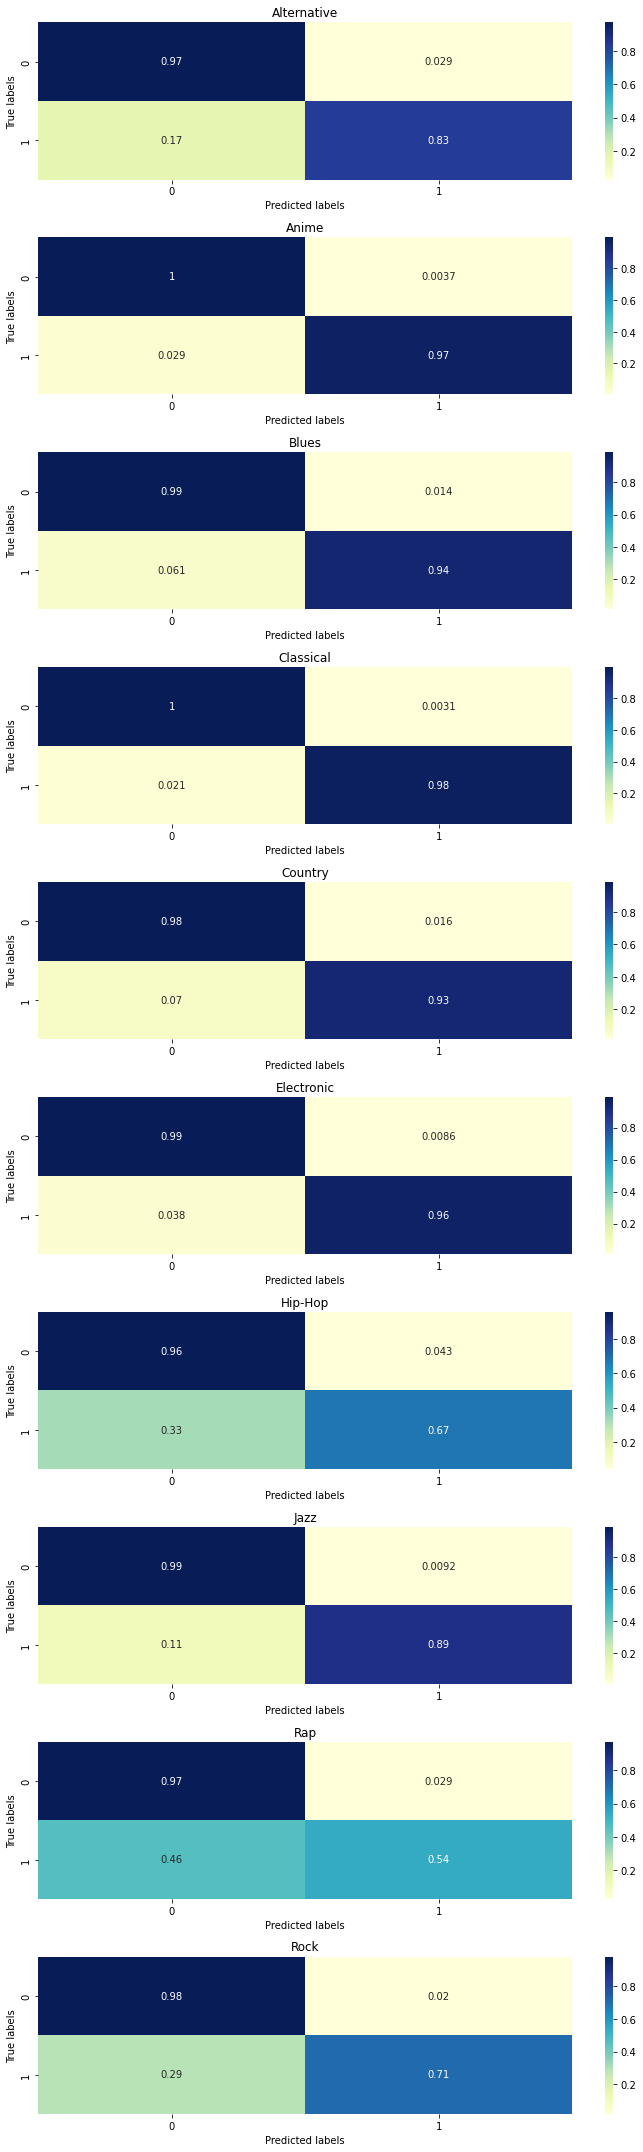

In [70]:
# Get the class labels
class_labels = mlb.classes_

# Loop through the labels and calculate the confusion matrix
cm = []
for i, label in enumerate(class_labels):
    y_true = y_test[:, i]
    y_pred2 = y_pred[:, i]
    cm_i = confusion_matrix(y_true, y_pred2)
    cm_i_norm = cm_i / cm_i.sum(axis=1, keepdims=True)
    cm.append(cm_i_norm)

# Loop through the labels and plot the confusion matrix
fig, axes = plt.subplots(nrows=len(class_labels), figsize=(10, 30))

for i, label in enumerate(class_labels):
    sns.heatmap(cm[i], annot=True, cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout()


On remarque que dans la version du OneVsAll classifier le modele n'arrive pas a bien détecter le label Rap


In [67]:
y_pred.shape

(10000,)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8425

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
ss = StandardScaler()


# charger les données
X_train, X_test, y_train, y_test = train_test_split(ss.fit_transform(Data.select_dtypes(exclude=['object']).values),  Data['music_genre'].apply(lambda x: [x]), test_size=0.2, random_state=42)

# convertir les étiquettes en un format binaire avec MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
y_train = mlb.inverse_transform(y_train)
y_test = mlb.inverse_transform(y_test)
#clf =make_pipeline(StandardScaler(), LogisticRegression())
    #RandomUnderSampler(random_state=42),
                   # LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000))
#print(y_test.shape)
# Initialisation du classifieur binaire
clf = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)
#clf = LogisticRegression()

# Initialisation de OneVsOneClassifier avec le classifieur binaire
ovo_clf = OneVsOneClassifier(clf)

# Entraînement du modèle
ovo_clf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = ovo_clf.predict(X_test)

# Évaluation des performances du modèle avec la métrique F1-score
accuracy = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
accuracy

0.8452

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

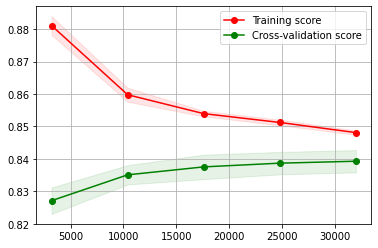

In [19]:

clf = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000)

ovo_clf = OneVsOneClassifier(clf)
my_model2 = ovo_clf

plot_learning_curve(my_model2, X_train, y_train,cv=5,n_jobs=4)

Le score appliqué est le Accuracy-score avec une validation croisée de 5. On remarque que le score d'entraînement diminue tandis que le score de validation augmente, puis les deux stagnent à 0,84. Ainsi, le modèle a bien appris et peut généraliser.

In [20]:
from sklearn.metrics import confusion_matrix

# Assuming ypred and ytest are already defined
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 816    2   17    0   25   22   40   13   12   61]
 [   1 1006    7   14    1    2    0    3    0    0]
 [  13   13  950    3    4    2    0   20    0   16]
 [   1   12    3  935    0    0    0    4    0    0]
 [  10    4   15    0  909    0    4    2    6   36]
 [   5    6    4    0    1  963    1   27    1    1]
 [  48    0    0    0    0    2  727    5  208    5]
 [   2    1   32   11    7   47    0  884    0    1]
 [  33    0    0    0   14    0  395    3  555   30]
 [ 129    2   30    1   78    1    3    6   20  707]]


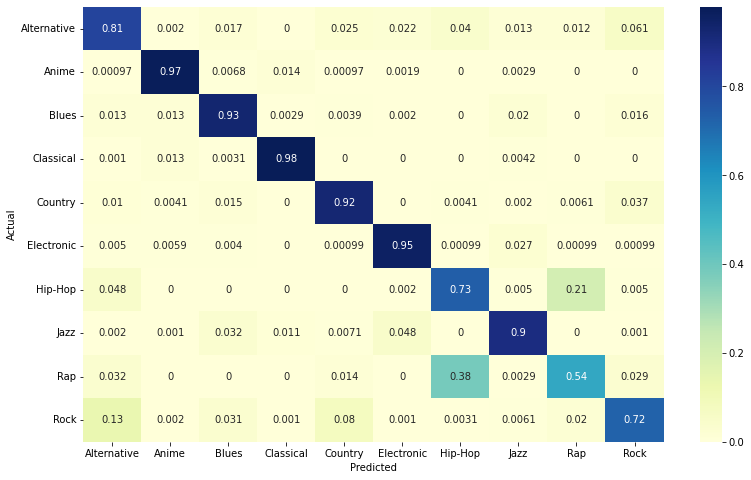

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = mlb.classes_
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(13, 8))
sns.heatmap(cm_norm, annot=True, cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

En analysant les résultats de la détection de labels, il est observé que les genres musicaux de rap et de hip-hop sont souvent confondus, avec le pourcentage le plus faible attribué à la détection du label "rap". En étudiant les "feature importance", il serait intéressant de se pencher sur la possibilité d'accorder plus d'importance à ces genres musicaux dans une future étude.

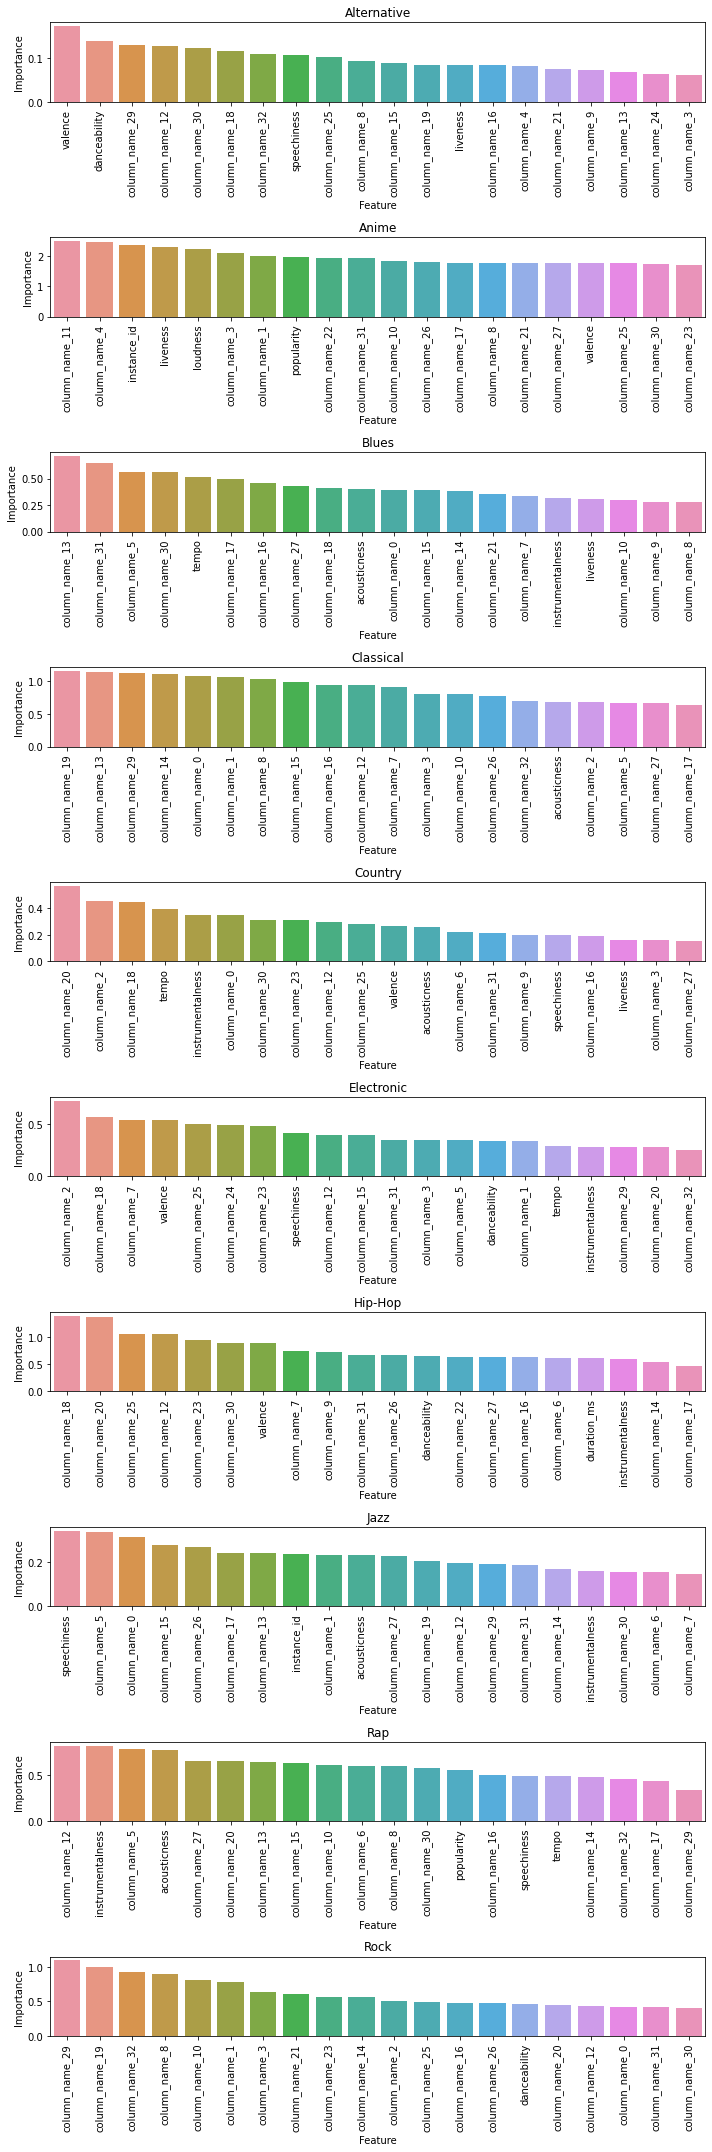

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the column names from the feature matrix
feature_names = Data.select_dtypes(exclude=['object']).columns

# Get the labels from the label binarizer
labels = mlb.classes_

# Get the final estimator from the pipeline
#final_estimator = ovo_clf.estimators_[-1]

# Get the feature importances for each logistic regression model
feature_importances = []
for estimator in ovo_clf.estimators_:
    feature_importances.append(abs(estimator.coef_[0]))

# Convert the feature importances and names into a dataframe
df_feature_importances = pd.DataFrame(feature_importances, columns=feature_names)

# Plot the top 5 feature importances for each label
fig, axes = plt.subplots(nrows=len(labels), figsize=(10, 30))
for i, label in enumerate(labels):
    top_20_features = df_feature_importances.iloc[:,i].sort_values(ascending=False)[:20]
    sns.barplot(x=feature_names[top_20_features.index], y=top_20_features, ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Importance')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


In [39]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class MyModel_dec(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.oversampler = SMOTE()
        self.models = [DecisionTreeClassifier(max_depth=max_depth) for _ in range(10)]

    def fit(self, X, y_bin):
        for i, model in enumerate(self.models):
            X_resampled, y_resampled = self.oversampler.fit_resample(X, y_bin[:, i])
            self.models[i]=model.fit(X_resampled, y_resampled)

    def predict(self, X):
        y_pred1 = np.zeros((X.shape[0], len(self.models)))
        y_pred2 = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            a = model.predict_proba(X)
            y_pred1[:, i] = a[:, 0]
            y_pred2[:, i] = a[:, 1]

        new_arr = np.zeros_like(y_pred2)
        

        new_arr[np.arange(y_pred2.shape[0]), np.argmax(y_pred2, axis=1)] = int(1)
        return new_arr    
    def score(self, X, y, sample_weight=None):
       # y = mlb.fit_transform(y)
      #  print("score",y.shape)
        y_pred = self.predict(X)
     #   print("score 0",y_pred.shape)
       # return f1_score(y, y_pred, average='weighted', sample_weight=sample_weight)
        return accuracy_score(y,y_pred)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

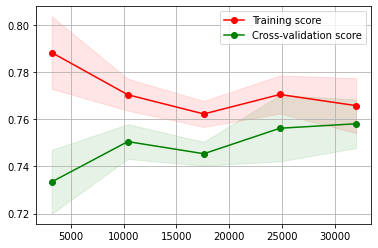

In [61]:
decision=MyModel_dec()

plot_learning_curve(decision, X_train, y_train,cv=5,n_jobs=4)

In [55]:
accuracy_score(y_test,y_pred)

0.7932

In [57]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.ensemble import RandomForestClassifier



class MyModel_ran(BaseEstimator, ClassifierMixin):
    def __init__(self, max_depth=5,n_estimators=10):
        self.n_estimators=n_estimators
        self.max_depth = max_depth
        self.oversampler = SMOTE()
        self.models = [RandomForestClassifier(n_estimators=10, max_depth=5)for _ in range(10)]

    def fit(self, X, y_bin):
        for i, model in enumerate(self.models):
            X_resampled, y_resampled = self.oversampler.fit_resample(X, y_bin[:, i])
            self.models[i]=model.fit(X_resampled, y_resampled)

    def predict(self, X):
        y_pred1 = np.zeros((X.shape[0], len(self.models)))
        y_pred2 = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            a = model.predict_proba(X)
            y_pred1[:, i] = a[:, 0]
            y_pred2[:, i] = a[:, 1]

        new_arr = np.zeros_like(y_pred2)
        

        new_arr[np.arange(y_pred2.shape[0]), np.argmax(y_pred2, axis=1)] = int(1)
        return new_arr    
    def score(self, X, y, sample_weight=None):
       # y = mlb.fit_transform(y)
      #  print("score",y.shape)
        y_pred = self.predict(X)
     #   print("score 0",y_pred.shape)
       # return f1_score(y, y_pred, average='weighted', sample_weight=sample_weight)
        return accuracy_score(y,y_pred)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

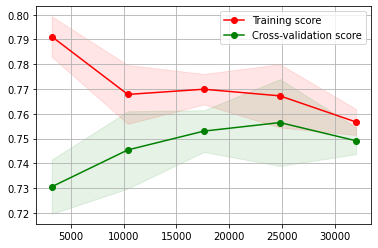

In [60]:
random=MyModel_ran()

plot_learning_curve(random, X_train, y_train,cv=5,n_jobs=4)